
## General instructions
Please copy this colab notebook into your own Drive to edit. This notebook will also serve as your final submission report - please ensure that code cells run correctly, and that all non-code (text/latex) blocks are rendered correctly before submissing the file. Feel free to add any additional cells (code or text) you need. Please follow good coding, markdown, and presentation etiquette.

__Please do not use any AI tools for this assignment.__


## Submission instructions

- Before submitting, please `run-all` the code. This will re-render your entire jupyter file cell by cell to produce all the outputs.

- You are required to download the colab notebook as a `.ipynb` file and submit it to canvas. Please name your `.ipynb` file as `netid.ipynb`

- Add a text cell on top with your name and the names of any collaborators from this class you worked with on this assignment.

- Download a pdf of the executed colab notebook. You can use print -> save as pdf. Please name your `.pdf` file as `netid.pdf`.

- Any extra images used in the homework should also be uploaded to canvas.

- For simplicity, you can also upload a `netid.zip` file to canvas containing all solution files.

In [ ]:
# DONOT CHANGE THIS LINE. INSTALLS REQUIRED PACKAGES FOR ASSIGNMENT
!pip install numpy opencv-python scikit-image
!pip install ipdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00


In [ ]:
# DONOT CHANGE THIS LINE. IMPORTS REQUIRED MODULES FOR ASSIGNMENT

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os, os.path as osp
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ./drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%ls ./Datasets/Imagesfromphone

In [ ]:
"""
Some helper functions that are optional to use.

"""

def min_max_normalize(x): return (x - x.min())/(x.max() - x.min()) # converts 0-255 uint8 image to 0-1 floating point image. Here, the max value of the image is mapped to 1 and min value is mapped to 0.

def normalize_255(x) : return x/255.0 # converts a 0-255 uint8 image to a floating 0-1 image by dividing by 255. Here, the images are consistently divided by 255.0 (max achievable value in an 8-bit image)

def show_image(image, title="", dpi=150, axis='off'):
    im = image.copy()
    plt.figure(dpi=dpi)
    plt.imshow(im)
    plt.axis(axis)
    plt.title(title)
    plt.tight_layout()
    plt.show()


def show_image_subplot(images : list [np.ndarray], num_rows:int, num_cols :int , titles : list[str] = [], axis:str ='off' , dpi:int = 80) -> None:
    """ shows a matplotlib subplot for multiple images"""
    assert num_rows > 1 or num_cols > 1 , "Please ensure that you have more than 1 row or col"
    assert len(images) == int(num_rows*num_cols), "Please ensure that number of images provided match rows x cols product"
    titles = titles + ["No Title" for _ in range(len(images)-len(titles))] if len(titles) < len(images) else titles[:len(images)]
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, dpi=dpi)
    axs_flat = axs.flatten()
    for (_ax, _im, _title) in zip(axs_flat, images, titles):
        _ax.imshow(_im)
        _ax.axis(axis)
        _ax.set_title(_title)
    plt.tight_layout()
    plt.show()

def get_img_dtype(image: np.ndarray) -> str:
    _dtype = image.dtype
    if _dtype not in ["uint8","float32", "float64"]:
        raise Exception(f"image is of dtype={image.dtype}. Please ensure that you work with either uint8 or float32/float64 images.")
    return _dtype


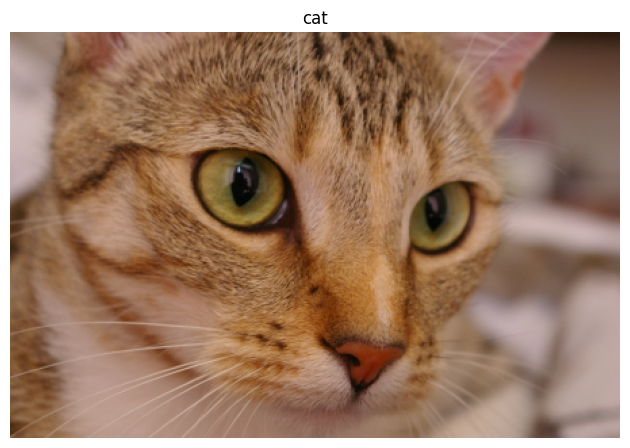

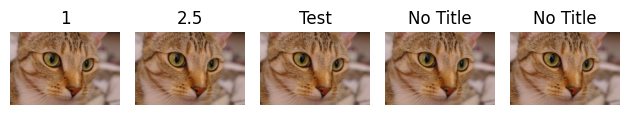

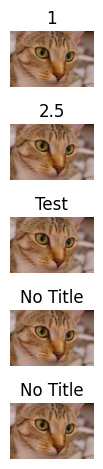

get_img_dtype(img)=dtype('uint8')
get_img_dtype(min_max_normalize(img))=dtype('float64')
get_img_dtype(normalize_255(img))=dtype('float64')
get_img_dtype(normalize_255(img).astype(np.float32))=dtype('float32')


In [ ]:
# Sample code for using above functions on a prepackaged image
import skimage.data
img = skimage.data.cat() # DONOT USE THIS FUNCTION / IMAGE FOR YOUR SUBMISSION. PLEASE USE YOUR OWN IMAGES.
show_image(img, dpi=100, title="cat")
show_image_subplot([img]*5, 1,5, titles=[1,2.5, "Test"],dpi=100)
show_image_subplot([img]*5, 5,1, titles=[1,2.5, "Test"],dpi=100)

# Printing out array types
print(f"{get_img_dtype(img)=}")
print(f"{get_img_dtype(min_max_normalize(img))=}")
print(f"{get_img_dtype(normalize_255(img))=}")
print(f"{get_img_dtype(normalize_255(img).astype(np.float32))=}")

# 1.0 Basic Image Operations

In this problem you will gain some experience with Numpy and OpenCV to perform basic image manipulations.

## 1.1 Combining two images

In [ ]:
def read_image(filename : str) -> np.ndarray:
    """
    write a function to read an image.
    return an opencv image / numpy array of shape H x W x C
    """
    # code here
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    return img# remove `pass` and replace with `return ....` statement


In [ ]:
def resize_image(image :np.ndarray, size: tuple) -> np.ndarray :
    """
    resize image to a given size
    return the resized image as an numpy array
    """
    # code here
    image = cv2.resize(image, (size, size), interpolation = cv2.INTER_LINEAR)
    return image # remove `pass` and replace with `return ....` statement

In [ ]:
def crop_image(image: np.ndarray, crop_window_size : tuple, crop_origin: tuple) -> np.ndarray :
    """
    image: np.ndarray
    crop_window_size: tuple comprising (width, height) of the cropped output
    crop_origin: tuple comprising (col, row) indices that mark the pixel around which you want to crop the image

    write a function that takes an image, crop_window_size ,and crop_origin and returns the cropped image
    """
    # code here
    image = image[crop_origin[0]-crop_window_size[1]//2:crop_origin[0]+crop_window_size[1]//2,
                  crop_origin[1]-crop_window_size[0]//2:crop_origin[1]+crop_window_size[0]//2]
    return image # remove `pass` and replace with `return ....` statement

In [ ]:
def interleave_using_forloops(image_a: np.ndarray, image_b: np.ndarray) -> np.ndarray :
    """
    write code to inverleave image for Q1.1d
    """
    # code here
    width = max(image_a.shape[0], image_b.shape[0])
    height = max(image_a.shape[1], image_b.shape[1])
    image_c = np.zeros((width, height, 3), dtype=image_a.dtype)
    for i in range(0, width):
      if i % 2 == 0:
        image_c[i, :, :] = image_a[i, :, :]
      else:
        image_c[i, :, :] = image_b[i, :, :]
    return image_c # remove `pass` and replace with `return ....` statement


In [ ]:
def interleave_without_forloops(image_a : np.ndarray, image_b: np.ndarray) -> np.ndarray :
    """
    Write code to inverleave image for Q1.1e

    """
    # code here
    width = max(image_a.shape[0], image_b.shape[0])
    height = max(image_a.shape[1], image_b.shape[1])
    image_c = np.zeros((width, height, 3), dtype=image_a.dtype)
    image_c[::2, :, :] = image_a[::2, :, :]
    image_c[1::2, :, :] = image_b[1::2, :, :]
    return image_c # remove `pass` and replace with `return ....` statement

In [ ]:
# please answer 1.1 here.


# 1.1a : read 2 images, display them
img_A = read_image('./Datasets/Imagesfromphone/20240918_200614.jpg')
img_A = cv2.cvtColor(img_A, cv2.COLOR_BGR2RGB) #Swap channel to display original color
show_image(img_A, title="Image 1", dpi=100)
img_B = read_image('./Datasets/Imagesfromphone/20240918_201942.jpg')
img_B = cv2.cvtColor(img_B, cv2.COLOR_BGR2RGB) #Swap channel to display original color
show_image(img_B, title="Image 2", dpi=100)

# 1.1b : resize and crop
img_A = resize_image(img_A, 256)
img_B = crop_image(img_B, (256,256), (img_B.shape[1]//2, img_B.shape[0]//2))

show_image(img_A, title="Resized Image 1", dpi=100)
show_image(img_B, title="Cropped Image 2", dpi=100)

# 1.1c : Create new image "C"
width = max(img_A.shape[0], img_B.shape[0])
height = max(img_A.shape[1], img_B.shape[1])
img_C = np.zeros((width, height, 3), dtype=img_A.dtype)
img_C[:, :img_C.shape[1]//2] = img_A[:, :img_A.shape[1]//2]
img_C[:, img_C.shape[1]//2:] = img_B[:, img_B.shape[1]//2:]

show_image(img_C, title="Image C", dpi=100)

# 1.1d : Use loop to interleave images
img_D = interleave_using_forloops(img_A, img_B)
show_image(img_D, title="Image D", dpi=100)

# 1.1e : interleave images without loops
img_D = interleave_without_forloops(img_A, img_B)
show_image(img_D, title="Image D", dpi=100)


Output hidden; open in https://colab.research.google.com to view.

## 1.2 : Color spaces

In [ ]:
def convert_image_to_hsv(image: np.ndarray) -> np.ndarray :
    """
    write a code using opencv to convert image from RGB to HSV colorspace.
    You can later reuse this function for Q1.2b
    """
    # code here
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return image # remove `pass` and replace with `return ....` statement


In [ ]:
def threshold_using_rgb(image:np.ndarray, threshold_low=[0, 0, 0], threshold_high=[255,255,255]) -> np.ndarray :
    """
    image: rgb np.ndarray image
    threshold_low : lower values for threshold for r,g,b channels
    threshold_high : upper values for threshold for r,g,b channels
    return a thresholded RGB image
    """
    # write code for thresholding rgb image here
    R, G, B = cv2.split(image)
    mask = cv2.inRange(image, (threshold_low[0], threshold_low[1], threshold_low[2]), (threshold_high[0], threshold_high[1], threshold_high[2]))
    # code here
    return mask # remove `pass` and replace with `return ....` statement


In [ ]:
def threshold_using_hsv(image:np.ndarray, threshold_low=[0, 0, 0], threshold_high=[255,255,255]) -> np.ndarray :
    """
    image: rgb np.ndarray image
    threshold_low : lower values for threshold for h,s,v channels
    threshold_high : upper values for threshold for h,s,v channels
    return a thresholded HSV image
    """
    hsv_image = convert_image_to_hsv(image)
    # write code for thresholding hsv image here
    H, S, V = cv2.split(hsv_image)
    mask = cv2.inRange(hsv_image, (threshold_low[0], threshold_low[1], threshold_low[2]), (threshold_high[0], threshold_high[1], threshold_high[2]))
    # code here
    return mask # remove `pass` and replace with `return ....` statement


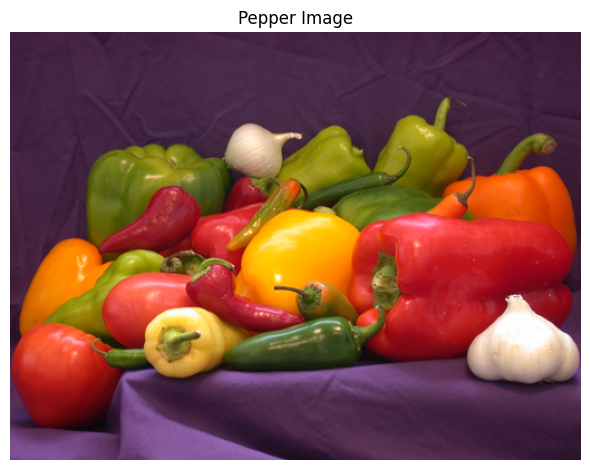

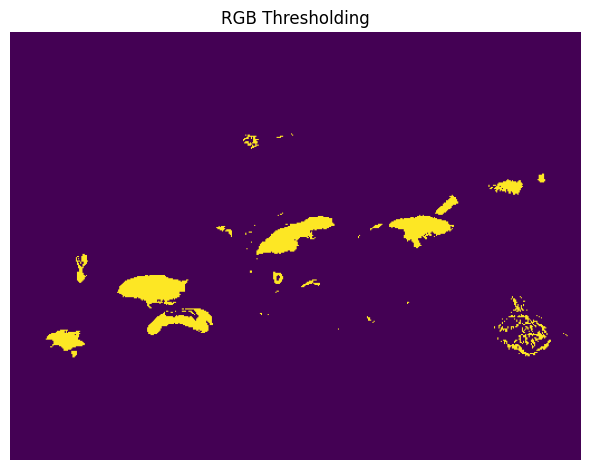

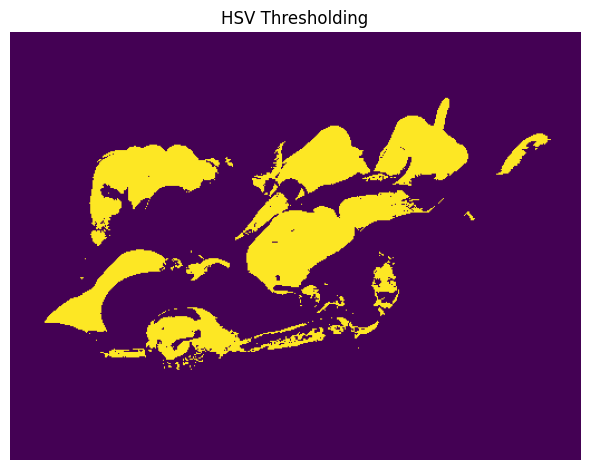

In [ ]:
# please answer 1.2
pepper_img = read_image('./Datasets/Imagesfromphone/peppers_BlueHills.png')
pepper_img_tmp = cv2.cvtColor(pepper_img, cv2.COLOR_BGR2RGB) #Swap channel to display original color
show_image(pepper_img_tmp, title="Pepper Image", dpi=100)
# 1.2a : RGB thresholding
show_image(threshold_using_rgb(pepper_img, threshold_low=[20, 20, 255], threshold_high=[255, 255, 255]), title="RGB Thresholding", dpi=100)
# 1.2b : HSV thresholding
pepper_img_hsv = cv2.cvtColor(pepper_img, cv2.COLOR_BGR2RGB) #Swap channel to display original color
show_image(threshold_using_hsv(pepper_img_hsv, threshold_low=[20, 100, 100], threshold_high=[40, 255, 255]), title="HSV Thresholding", dpi=100)

1.2c : Please write answer here. You can use code-cells for displaying images if you'd like.
Answer:
- HSV for object detection, instance segmentation or other tasks that required working with object exposed to lighting
- RGB for image display, image processing,...

# 2D Geometric Transforms

Geometric transformations are fundamental tools used in a variety of computer vision and computer graphics applications. In this problem, you will write your own code to warp images using 2D geometric transforms.

2.1a : Please write answer here.
Answer: Degree of freedom of each transformation is:
- Translation: 2 -> horizontal and vertical displacement
- Rotation: 1 -> 1 'parameter' of rotation matrix
- Similarity: 4 -> horizontal, vertical displacement and Roatation and Scaling factor
- Affine: 6 -> 2 for translation, 1 for rotation, 1 for sacling, 2 for shearing

2.1b : Please write answer here. IF you want you can also code this up for better understanding and visualization.


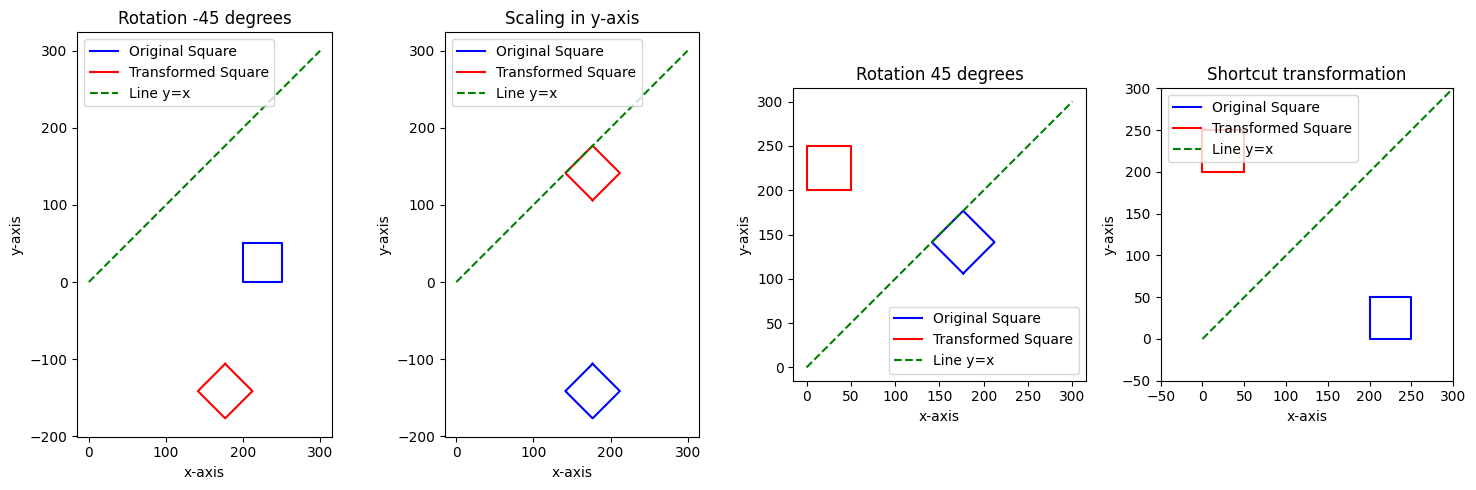

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vertices of the original square
original_square_vertices = np.array([[200, 50], [250, 50], [250, 0], [200, 0], [200, 50]]) # Closed loop

# Define the transformation matrices
theta = np.pi / 4
rotation_45neg_matrix = np.array([[np.cos(-theta), -np.sin(-theta)], [np.sin(-theta), np.cos(-theta)]])
scaling_matrix = np.array([[1,0], [0, -1]])
rotation_45npos_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
final_transformation_matrix = np.array([[0, 1], [1, 0]])

def apply_transformation(transformation_matrix, vertices):
  transformed_square_vertices = []
  for vertex in vertices[:-1]:
      vertex_vector = np.array(vertex)
      transformed_vertex_vector = transformation_matrix @ vertex_vector
      transformed_square_vertices.append(transformed_vertex_vector)
  transformed_square_vertices.append(transformed_square_vertices[0])
  return np.array(transformed_square_vertices)

def plot_transformation_step(ax, vertices, transformed_vertices, title):
    original_x = vertices[:, 0]
    original_y = vertices[:, 1]
    transformed_x = transformed_vertices[:, 0]
    transformed_y = transformed_vertices[:, 1]
    ax.plot(original_x, original_y, 'b-', label='Original Square')
    ax.plot(transformed_x, transformed_y, 'r-', label='Transformed Square')
    x_line = np.linspace(0, 300, 100)
    y_line = x_line
    ax.plot(x_line, y_line, 'g--', label='Line y=x')
    plt.xlim(-50, 300)
    plt.ylim(-50, 300)
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_title(title)
    ax.legend()
    ax.set_aspect('equal', adjustable='box')


# Apply transformations step by step
matrix1 = apply_transformation(rotation_45neg_matrix, original_square_vertices)
matrix2 = apply_transformation(scaling_matrix, matrix1)
matrix3 = apply_transformation(rotation_45npos_matrix, matrix2)
matrix_shortcut = apply_transformation(final_transformation_matrix, original_square_vertices)

# Plotting
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

plot_transformation_step(axes[0], original_square_vertices, matrix1, "Rotation -45 degrees")
plot_transformation_step(axes[1], matrix1, matrix2, "Scaling in y-axis")
plot_transformation_step(axes[2], matrix2, matrix3, "Rotation 45 degrees")
plot_transformation_step(axes[3], original_square_vertices, matrix_shortcut, "Shortcut transformation")

plt.tight_layout()
plt.show()

## 2.2  Write functions to produce transformation matrices.



In [ ]:
def translation_mtx(original_matrix: np.ndarray, x: float, y: float) -> np.ndarray:
    transformation_mtx = np.array([[1, 0, x], [0, 1, y], [0, 0, 1]])
    return transformation_mtx # remove `pass` and replace with `return ....` statement

def rotation_mtx(angle: float) -> np.ndarray:
    rotation_mtx = np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0, 0, 1]])
    return rotation_mtx # remove `pass` and replace with `return ....` statement

def similarity(x: int, y: int, scale: float, rotation: np.ndarray) -> np.ndarray:
    sR_mtx = scale * rotation
    similarity_mtx = np.array([[sR_mtx[0][0], sR_mtx[0][1], x], [sR_mtx[1][0], sR_mtx[1][1], y], [0, 0, 1]])
    return similarity_mtx # remove `pass` and replace with `return ....` statement

def affine(a,b,c,d,e,f) -> np.ndarray:
    return np.array([[a, b, c], [d, e, f], [0, 0, 1]]) # remove `pass` and replace with `return ....` statement

## 2.3 Warping an image

In [ ]:
def imwarp(image: np.ndarray, T: np.ndarray) -> np.ndarray :
    """
    Write a function that takes an image and transformation matrix as input
    and returns a transformed image
    """
    translation_origintocenter = np.array([[1, 0, -(image.shape[1]-1)/2], [0, 1, -(image.shape[0]-1)/2], [0, 0, 1]])
    translation_originback = np.array([[1, 0, (image.shape[1]-1)/2], [0, 1, (image.shape[0]-1)/2], [0, 0, 1]])
    transformation_matrix = translation_originback @ T @ translation_origintocenter

    transformed_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=image.dtype) # H x W x 3
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            point = np.array([x, y, 1])
            new_point = transformation_matrix @ point
            new_x = int(new_point[0])
            new_y = int(new_point[1])
            if 0 <= new_x < image.shape[1] and 0 <= new_y < image.shape[0]:
                transformed_image[y, x] = image[new_y, new_x]
    # code here
    return transformed_image # remove `pass` and replace with `return ....` statement


In [ ]:
# 2.4 : Demonstrate your warping. Please write code and discuss solutions here.
original_image = read_image('./Datasets/Imagesfromphone/peppers_BlueHills.png')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB) #Swap channel to display original color
show_image(original_image)

# Translation
tx, ty = (11, 25)
for i in (-1, 1):
  for j in (-1, 1):
    image_test = imwarp(original_image, translation_mtx(original_image, x=i*tx, y=j*ty))
    show_image(image_test)

# Rotate
image_test = imwarp(original_image, rotation_mtx(30))
show_image(image_test)
image_test = imwarp(original_image, rotation_mtx(-30))
show_image(image_test)

# Similarity
image_test = imwarp(original_image, similarity(0, 0, scale=0.5, rotation=rotation_mtx(60)))
show_image(image_test)

# Affine
image_test = imwarp(original_image, affine(2, -3, 1.25, 1, -0.5, 2))
show_image(image_test)

Output hidden; open in https://colab.research.google.com to view.

# 3.0 Camera Matrix Computation

## 3.1
a.
- Camera intrinsic K = [[fx s cx], [0, fy, cy], [0, 0, 1]] (fx, fy are focal length; cx, cy are principal points; s are skew factor and usually = 0)
- Camera extrinsic [R t] is the combined of rotation and translation transformation matrix

b.
- K = [[100, 0, 25], [0, 100, 25], [0, 0, 1]]
- E = [[1, 0, 0, 1], [0, 0, -1, 0], [0, 1, 0, 2]]
- P = [[100, 25, 0, 150], [0, 25, -100, 50], [0, 1, 0, 2]]

c.
- No, it is not possible to uniquely convert a coordinate in image space back to world coordinate space. The projection process loses one degree of freedom, which corresponds to the depth or distance of the 3D point along the viewing ray. For a given image point, there is a ray of 3D points in world space that could have projected to it, but we cannot determine a unique 3D point without additional information (like depth).

## 3.2.
F.O.V = w/f, which means F.O.V is bigger when f is smaller. Therefore, the camera with wider F.O.V has shorter focal length

## 4.0 Relighting [ ELEC/COMP 546 ONLY ]


In [ ]:
def blend(image1 : np.ndarray, image2 : np.ndarray) -> np.ndarray:
    """
    I12_synth = I1 + I2
    """
    pass # remove `pass` and replace with `return ....` statement



In [ ]:
def show_differences(image_synth : np.ndarray, real_image : np.ndarray) -> np.ndarray:
    """
    D = I12_synth - I12.
    """
    pass # remove `pass` and replace with `return ....` statement

In [ ]:
# 4a, 4b, 4c, 4d Please write answer here


In [ ]:
# Feel free to add more code-cells or text-cells for any of the above questions!